In [3]:
#We will use pandas to directly read data from Yahoo finance using pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pandas_datareader import data, wb

In [5]:
import os

In [6]:
import pandas_datareader as pdr

In [7]:
from datetime import datetime

In [46]:
start = datetime(2006, 1, 1)

In [47]:
end = datetime(2019, 9, 30)


# Setting up the Yahoo Stock Data in formats that are useful for EDA


In [48]:
BAC = data.DataReader('BAC','yahoo',start,end) #Bank of America
C = data.DataReader('C','yahoo',start,end) #CitiGroup
GS = data.DataReader('GS','yahoo',start,end) #Goldman Sachs
JPM = data.DataReader('JPM','yahoo',start,end) #JPMorgan Chase
MS = data.DataReader('MS','yahoo',start,end) #Morgan Stanley
WFC = data.DataReader('WFC','yahoo',start,end) # Wells Fargo

In [49]:
BAC.tail(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-04,27.580000,27.160000,27.320000,27.490000,40862500.0,27.310001
2019-09-05,28.430000,27.799999,27.850000,28.120001,63413700.0,28.120001
2019-09-06,28.090000,27.570000,28.020000,27.730000,56054100.0,27.730000
2019-09-09,28.850000,27.969999,28.000000,28.629999,68629300.0,28.629999
2019-09-10,29.350000,28.809999,28.889999,29.350000,71066200.0,29.350000
2019-09-11,29.469999,28.900000,29.370001,29.459999,53982200.0,29.459999
2019-09-12,29.799999,28.910000,29.219999,29.670000,72943900.0,29.670000
2019-09-13,30.320000,29.870001,30.000000,30.170000,79657000.0,30.170000
2019-09-16,30.170000,29.639999,29.680000,30.129999,43391300.0,30.129999


In [50]:
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,38.292645
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,38.318924
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,38.423988
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,38.463394
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,38.870537
...,...,...,...,...,...,...
2019-09-25,43.160000,42.349998,42.349998,43.040001,6909400.0,43.040001
2019-09-26,43.009998,42.580002,42.959999,42.619999,5343800.0,42.619999
2019-09-27,43.180000,42.500000,42.959999,42.840000,8005200.0,42.840000


In [52]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [53]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers) # Creating a multiindex

In [54]:
bank_stocks.head(20)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   
2006-01-10  46.509998  45.880001  46.400002  46.209999  15634600.0  35.057823   
2006-01-11  46.250000  45.750000  46.060001  46.099998  14742100.0  34.974361   
2006-01-12  46.230000  45.709999  46.220001  45.799999  10546600.0  34.746761   
2006-01-13  46.000000  45.680000  45.830002  45.799999  10791000.0  34.746761   
2006-01-17  45.580002  45.000000  45.400002  45.310001  14605900.0  34.375031   
2006-01-18  45.650002  44.919998  45.320000  45.259998  10867000.0  34.337090   
2006-01-19  45.880001  44.849998  45.880001  45.139999  14584000.0  34.246059   
2006-01-20  45.150002  44.169998  45.000000  44.189999  24950800.0  33.525326   
2006-01-23  44.389999  43.490002  43.500000  43.959999  23459500.0  33.350845   
2006-01-24  44.680000  44.040001  44.080002  44.240002  13500300.0  33.563255   
2006-01-25  44.650002  44.150002  44.150002  44.630001  15132000.0  33.859135   
2006-01-26  45.160000  44.669998  45.000000  44.900002  18449100.0  34.063980   
2006-01-27  45.110001  44.610001  44.900002  44.799999  12250800.0  33.988106   
2006-01-30  45.349998  44.250000  44.750000  44.480000  14812100.0  33.745342   
2006-01-31  44.730000  44.119999  44.650002  44.230000  19151000.0  33.555672   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
2006-01-10  485.500000  480.799988  483.000000  485.399994  ...  58.849998   
2006-01-11  495.799988  485.799988  495.799988  489.799988  ...  59.150002   
2006-01-12  491.000000  488.799988  491.000000  490.299988  ...  59.630001   
2006-01-13  491.899994  487.299988  491.000000  489.200012  ...  59.570000   
2006-01-17  487.000000  482.700012  485.100006  484.299988  ...  59.450001   
2006-01-18  486.700012  481.100006  484.299988  483.600006  ...  58.549999   
2006-01-19  485.799988  477.000000  485.600006  479.399994  ...  58.750000   
2006-01-20  474.000000  456.299988  472.100006  456.899994  ...  59.299999   
2006-01-23  463.799988  457.000000  460.000000  460.000000  ...  57.700001   
2006-01-24  463.600006  459.899994  462.899994  460.100006  ...  58.820000   
2006-01-25  463.700012  460.100006  461.399994  462.299988  ...  59.000000   
2006-01-26  475.500000  464.500000  465.500000  470.100006  ...  60.490002   
2006-01-27  473.700012  466.000000  470.100006  468.700012  ...  60.000000   
2006-01-30  469.899994  466.600006  468.700012  468.200012  ...  61.450001   
2006-01-31  470.500000  465.500000  468.299988  465.799988  ...  60.500000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.292645  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.31

In [55]:
bank_stocks.columns.names=['Bank Ticker','Stock Info'] # Setting the column name levels

In [56]:
bank_stocks.head(20)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
2006-01-10   46.509998  45.880001  46.400002  46.209999  15634600.0   
2006-01-11   46.250000  45.750000  46.060001  46.099998  14742100.0   
2006-01-12   46.230000  45.709999  46.220001  45.799999  10546600.0   
2006-01-13   46.000000  45.680000  45.830002  45.799999  10791000.0   
2006-01-17   45.580002  45.000000  45.400002  45.310001  14605900.0   
2006-01-18   45.650002  44.919998  45.320000  45.259998  10867000.0   
2006-01-19   45.880001  44.849998  45.880001  45.139999  14584000.0   
2006-01-20   45.150002  44.169998  45.000000  44.189999  24950800.0   
2006-01-23   44.389999  43.490002  43.500000  43.959999  23459500.0   
2006-01-24   44.680000  44.040001  44.080002  44.240002  13500300.0   
2006-01-25   44.650002  44.150002  44.150002  44.630001  15132000.0   
2006-01-26   45.160000  44.669998  45.000000  44.900002  18449100.0   
2006-01-27   45.110001  44.610001  44.900002  44.799999  12250800.0   
2006-01-30   45.349998  44.250000  44.750000  44.480000  14812100.0   
2006-01-31   44.730000  44.119999  44.650002  44.230000  19151000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   
2006-01-10   35.057823  485.500000  480.799988  483.000000  485.399994  ...   
2006-01-11   34.974361  495.799988  485.799988  495.799988  489.799988  ...   
2006-01-12   34.746761  491.000000  488.799988  491.000000  490.299988  ...   
2006-01-13   34.746761  491.899994  487.299988  491.000000  489.200012  ...   
2006-01-17   34.375031  487.000000  482.700012  485.100006  484.299988  ...   
2006-01-18   34.337090  486.700012  481.100006  484.299988  483.600006  ...   
2006-01-19   34.246059  485.799988  477.000000  485.600006  479.399994  ...   
2006-01-20   33.525326  474.000000  456.299988  472.100006  456.899994  ...   
2006-01-23   33.350845  463.799988  457.000000  460.000000  460.000000  ...   
2006-01-24   33.563255  463.600006  459.899994  462.899994  460.100006  ...   
2006-01-25   33.859135  463.700012  460.100006  461.399994  462.299988  ...   
2006-01-26   34.063980  475.500000  464.500000  465.500000  470.100006  ...   
2006-01-27   33.988106  473.700012  466.000000  470.100006  468.700012  ...   
2006-01-30   33.745342  469.899994  466.600006  468.700012  468.200012  ...   
2006-01-31   33.555672  470.500000  465.500000  468.299988  465.799988  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  31.77

# EDA

In [57]:
#Pandas operations of cross section operation
#What is the max close price for each bank's stock throughout the time period?
for tick in tickers:
    print(bank_stocks[tick]['Close'].max())

54.900001525878906
564.0999755859375
273.3800048828125
120.2300033569336
89.30000305175781
65.93000030517578


In [58]:
#Here's a better way using the .xs method
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2019-09-25,29.250000,69.379997,210.029999,118.000000,43.040001,49.259998
2019-09-26,29.129999,69.110001,208.220001,117.029999,42.619999,48.869999
2019-09-27,29.350000,69.459999,208.970001,117.720001,42.840000,50.709999


In [59]:
#find the max values using the .xs method
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    120.230003
MS      89.300003
WFC     65.930000
dtype: float64

In [60]:
# create a new empty dataframe called returns
returns = pd.DataFrame()

In [61]:
# use pandas pct_change() method on the close colum to create a column representing this return value.
# We need a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the 
#returns DataFrame
for tick in tickers:
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()

In [62]:
returns.head() # Won't get a return on the first entry because there is no percent change

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


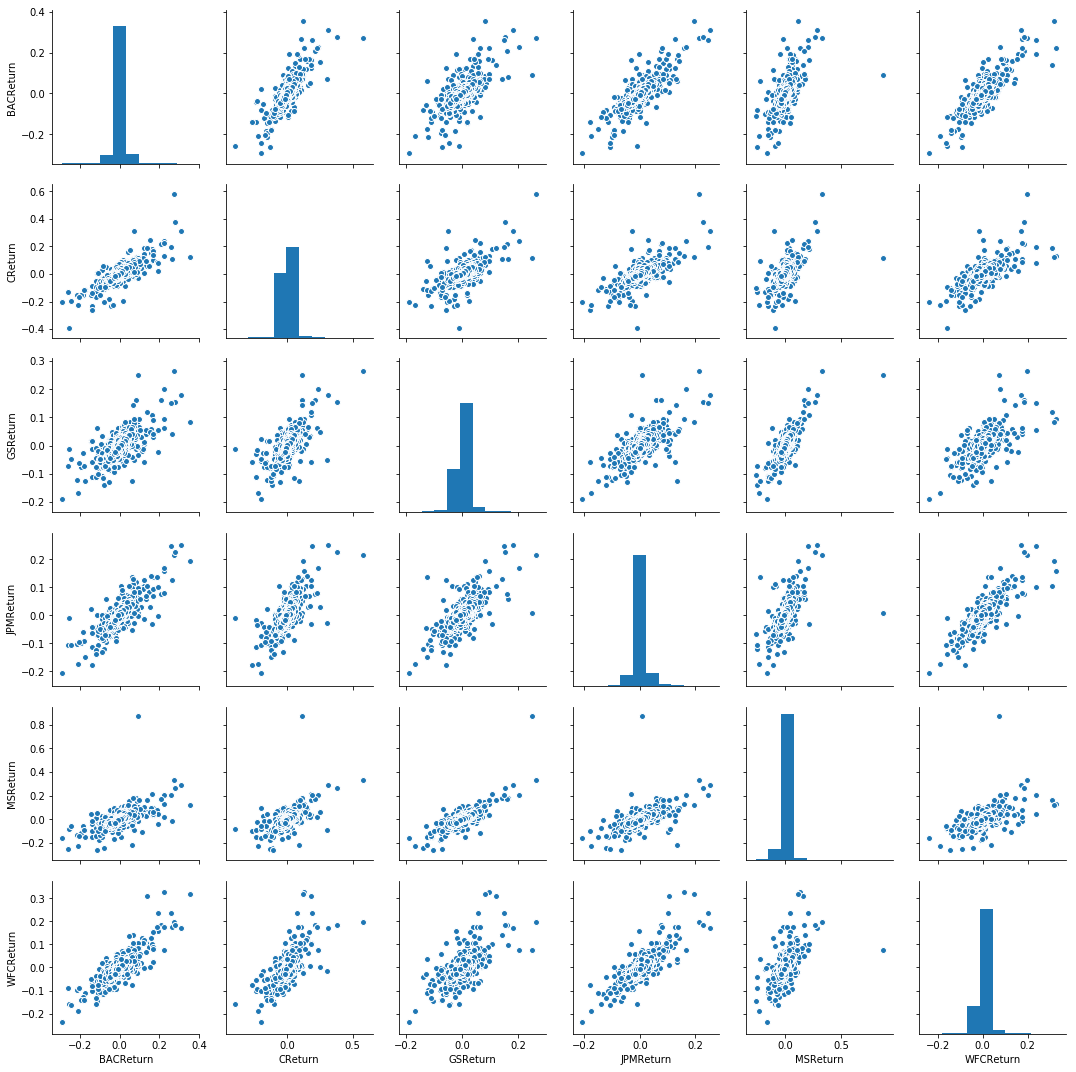

In [63]:
#Creating a pairplot using seaborn of the returns datafram.
# ignore index 0 due to the null
sns.pairplot(returns[1:]);

In [67]:
#Using the returns DataFrame, which dates each bank stock had the best and worst single day returns
returns.idxmin() # Returns a series with the dates with indexes and minimum values of returns for each bank

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [68]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [70]:
#take a look at the standard deviation of the returns, which stock would be considered the riskiest over the entire time period?
returns.std()

BACReturn    0.032417
CReturn      0.034017
GSReturn     0.023104
JPMReturn    0.024583
MSReturn     0.033439
WFCReturn    0.026761
dtype: float64

In [75]:
#what about in 2015? Grab a slice of the index
returns.loc['2015-01-01':'2015-12-31'].std() #all about the same STD

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


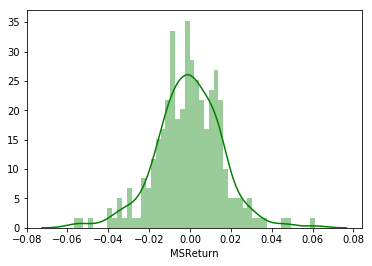

In [79]:
# Use a displot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'], color='green', bins=50);

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


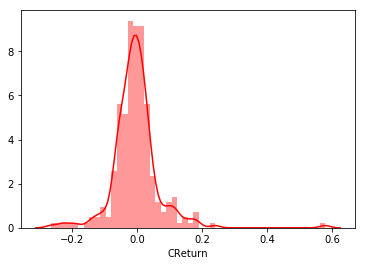

In [81]:
#Use a displot of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'], color='red', bins=50);

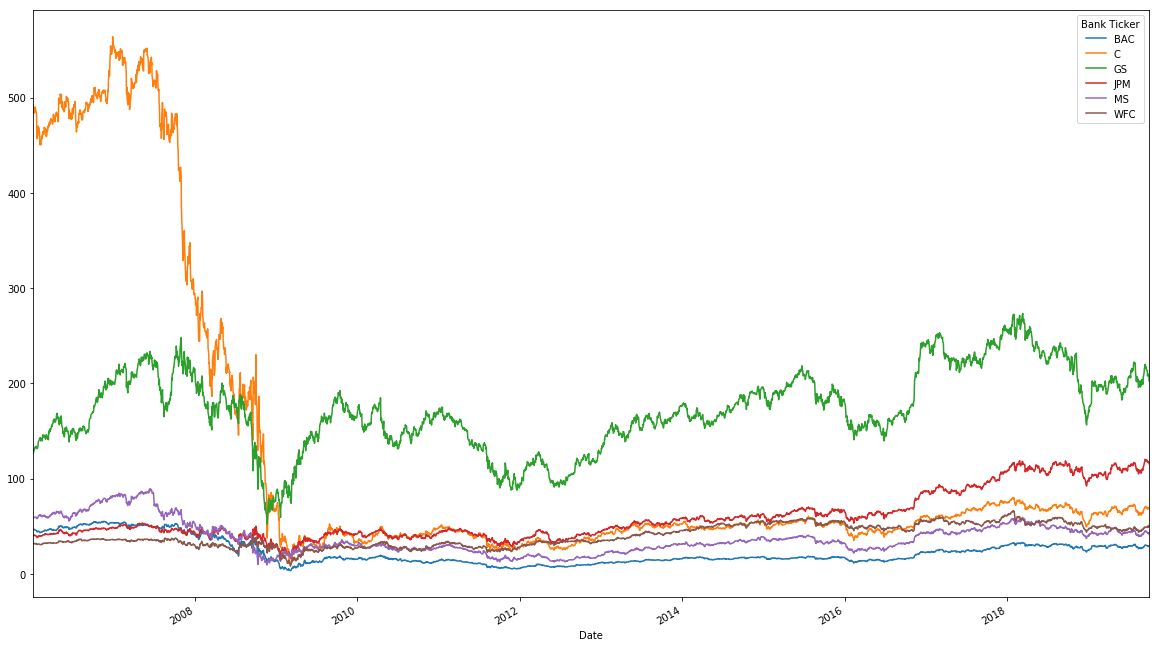

In [92]:
#create a line plot showing Close price for each bank for the entire index of time
#use the .xs method
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(20,12));

In [95]:
#Try using plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot();

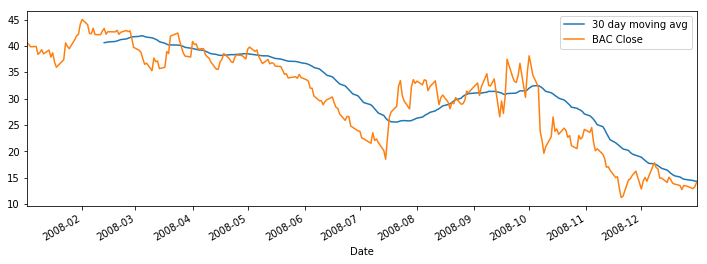

In [104]:
#Plot the rolling 30 day average against the Close Price for Bank of America's stock for the year 2008
plt.figure(figsize=(12,4));
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving avg');
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close');
plt.legend();

In [105]:
#Create a heatmap between the correlation of the stock's closing prices
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.904383,0.504168,0.189381,0.938430,0.073922
C,0.904383,1.000000,0.188948,-0.188684,0.828031,-0.197575
GS,0.504168,0.188948,1.000000,0.751015,0.667480,0.683771
JPM,0.189381,-0.188684,0.751015,1.000000,0.317866,0.807128
MS,0.938430,0.828031,0.667480,0.317866,1.000000,0.234055
WFC,0.073922,-0.197575,0.683771,0.807128,0.234055,1.000000


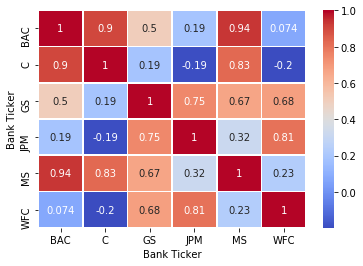

In [112]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap="coolwarm", linewidths=0.7);

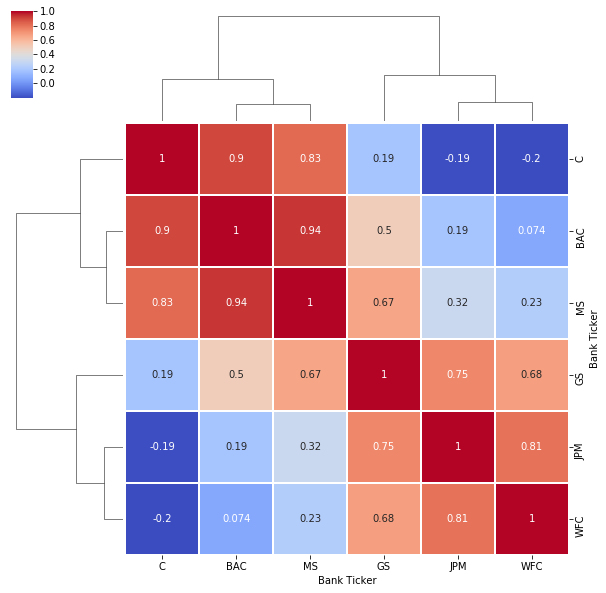

In [113]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap="coolwarm", linewidths=0.7);

In [115]:
# Using plotly and cufflinks to plot out the financial data
# heatmap using plotly
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr #make sure data is in matrix form

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.904383,0.504168,0.189381,0.938430,0.073922
C,0.904383,1.000000,0.188948,-0.188684,0.828031,-0.197575
GS,0.504168,0.188948,1.000000,0.751015,0.667480,0.683771
JPM,0.189381,-0.188684,0.751015,1.000000,0.317866,0.807128
MS,0.938430,0.828031,0.667480,0.317866,1.000000,0.234055
WFC,0.073922,-0.197575,0.683771,0.807128,0.234055,1.000000


In [122]:
#making a heatmap using plotly
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [125]:
#create a candle plot using plotly
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'] #need it in a specific order
bac15.iplot(kind='candle')# for financial analysis, tells you if stock went up or down that day. Green = up, red=down

In [127]:
#simple moving average plot (SMA)
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])#a technical analysis plot

In [128]:
#creating a Bollinger Band Plot for Bank of America for the year 2015
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')